[View in Colaboratory](https://colab.research.google.com/github/novamit/hello-world/blob/master/Facebook_Data_Sumit.ipynb)

**Analyze the Facebook data**

**Exploration ideas:**

**Date of birth analysis -** First identify the outliers and eliminate those users from dataset. Now divide the age in multiple buckets and analyze which age group is more active on facebook. Further, we need to analyze which age group have more male or female who are active on facebook.

**Friend count analysis -** First identify the outliers and the users who have no friends and eleminate from dataset. Now identify which age group has more friends. Further, we can analyze which age group of male or female have more friends. Also, identify which age group has 100+ friends.
Find out which age group has initiated more friend request and futher analyze among male and female.

**Tenure analysis -** Analyze the trend YoY of new users onboard and also analyze of trend YoY of new male and female users onboard.

**Like analysis -**



### **Upload and understanding of facebook data**

In [1]:
!pip install pandas-profiling

In [0]:
import numpy as np
import pandas as pd
import pandas_profiling

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import files
import io


In [6]:
uploaded = files.upload()
facebook_data = pd.read_table(io.StringIO(uploaded['pseudo_facebook.tsv'].decode('utf-8')))

Saving pseudo_facebook.tsv to pseudo_facebook (1).tsv


In [0]:
report = pandas_profiling.ProfileReport(facebook_data)
report.to_file('facebook_data.html')
files.download('facebook_data.html')

In [7]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [8]:
facebook_data.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


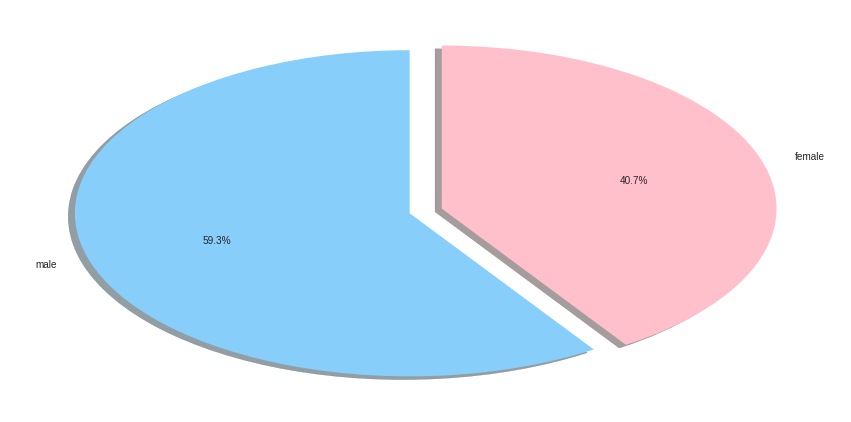

In [9]:
# Create pie chart to know which gender (male/female) is more on facebook

fig = plt.figure(figsize=(15,7.5))
labels = ['male', 'female']
sizes = facebook_data.gender.value_counts()
colors = ['lightskyblue', 'pink']
explode = (0.05, 0.05)

plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

### **Data Cleaning**

In [0]:
# Gender is missing in 175 places of dataset that is .17% and these missing gender are replaced by mode of gender

facebook_data['gender'].fillna(facebook_data['gender'].mode()[0],inplace=True)

In [0]:
# Tenure is missing in only 2 places of dataset, i.e .002% and these missing tenure are replaced by mean of tenure

facebook_data['tenure'].fillna(facebook_data['tenure'].mean(),inplace=True)

In [12]:
# Get info of facebook data after replacing the values

facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null object
tenure                   99003 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [13]:
facebook_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.645251,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [0]:
# Generic function to find outliers from any column

def detect_outliers(col):
  Q1 = np.percentile(facebook_data[col],25)
  Q3 = np.percentile(facebook_data[col],75)
  IQR = Q3 - Q1
  
  # outlier step
  outlier_step = 1.5 * IQR
  
  # Determine a list of indices of outliers for feature col
  outlier_list_col = facebook_data[(facebook_data[col] < Q1 - outlier_step) | (facebook_data[col] > Q3 + outlier_step )].index
  
  return outlier_list_col

In [0]:
# User this cell when need to drop the column(s)

# facebook_data = facebook_data.drop(['friend_count_cat', 'age_group', 'active_user',	'gender_num',	'friend_count_cat_num',	'age_group_num', 'tenure_bin'], axis=1)

### **Date of birth analysis **

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


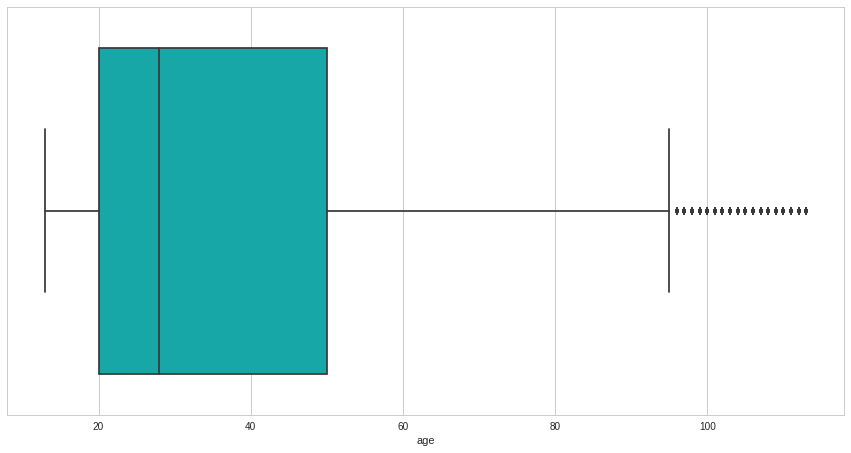

In [15]:
# Draw a boxplot to visualize outliers in respect of age

fig = plt.figure(figsize=(15,7.5))
sns.set_style("whitegrid")
sns.boxplot(x='age', data=facebook_data, color='c')
plt.show()

In [0]:
# Remove the complete row where the age is outlier

outliers_to_drop = detect_outliers('age')
facebook_data_remout_age = facebook_data.drop(facebook_data.index[outliers_to_drop])
facebook_data = facebook_data_remout_age

In [44]:
# Reindexing the facebook data after removing rows

facebook_data.reset_index(drop=True, inplace=True)
facebook_data.head()


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,20


In [18]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94689 entries, 0 to 99002
Data columns (total 15 columns):
userid                   94689 non-null int64
age                      94689 non-null int64
dob_day                  94689 non-null int64
dob_year                 94689 non-null int64
dob_month                94689 non-null int64
gender                   94689 non-null object
tenure                   94689 non-null float64
friend_count             94689 non-null int64
friendships_initiated    94689 non-null int64
likes                    94689 non-null int64
likes_received           94689 non-null int64
mobile_likes             94689 non-null int64
mobile_likes_received    94689 non-null int64
www_likes                94689 non-null int64
www_likes_received       94689 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.6+ MB


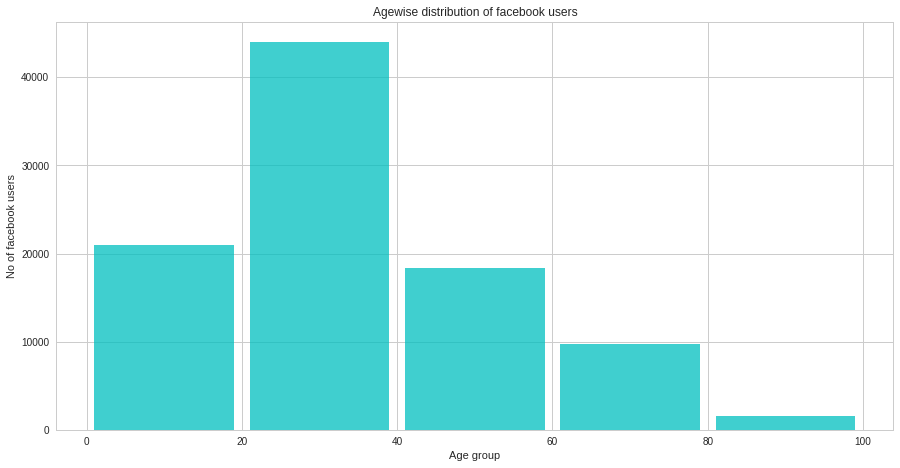

In [30]:
# Draw a histrogram to visualize which age group users are more on facebook

fig = plt.figure(figsize=(15,7.5))
bin_edges = [0,20,40,60,80,100]
plt.hist(facebook_data['age'], bins=bin_edges, facecolor='c', alpha=0.75, rwidth=0.90)
plt.xlabel('Age group')
plt.ylabel('No of facebook users')
plt.title('Agewise distribution of facebook users')
plt.grid(True)

In [0]:
# Create a function to add a column 'age_group' in dataset

def age_group(row):
  if row['age'] < 20 :
     return '20'
  if row['age'] >=20 and row['age'] < 40 :
     return '40'
  if row['age'] >= 40 and row['age'] < 60 :
     return '60'
  if row['age'] >= 60 and row['age'] < 80:
     return '80'
  if row['age']  >= 80:
     return '100'
  
facebook_data['age_group'] = facebook_data.apply(lambda row: age_group(row),axis=1)


In [39]:
facebook_data.reset_index(drop=True, inplace=True)
facebook_data.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202,80
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,20
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,20
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,40
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913,40


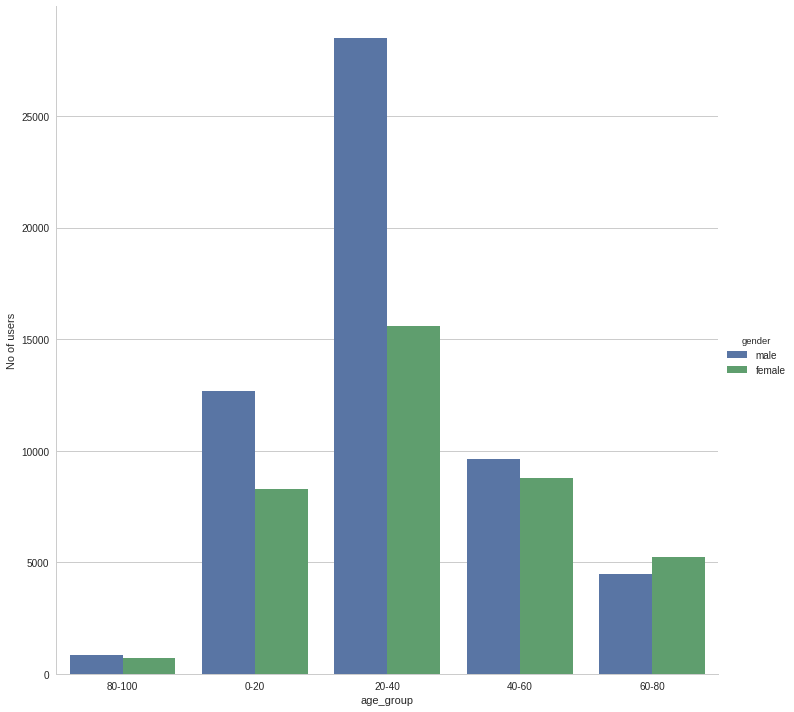

In [27]:
# Draw a factor plot to visualize the no of users genderwise in user_group

fig = plt.figure(figsize=(20,10))
sns.factorplot(x='age_group', hue='gender', data=facebook_data, kind='count', size=10)
locs, title = plt.xticks()
plt.xticks(locs,('80-100','0-20','20-40','40-60','60-80'))
plt.ylabel('No of users')
plt.show()

### **Friend count analysis**

In [31]:
facebook_data['friend_count'].describe()

count    94689.000000
mean       187.205811
std        373.920512
min          0.000000
25%         30.000000
50%         78.000000
75%        196.000000
max       4917.000000
Name: friend_count, dtype: float64

Text(0.5,1,u'Friend count wise distribution of the facebook users')

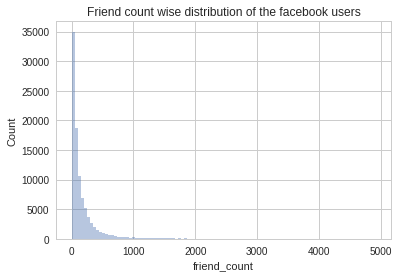

In [32]:
# Draw distribution plot to vizualize the data skewness

sns.distplot(facebook_data['friend_count'], bins=100, kde=False)
plt.ylabel('Count')
plt.title('Friend count wise distribution of the facebook users')

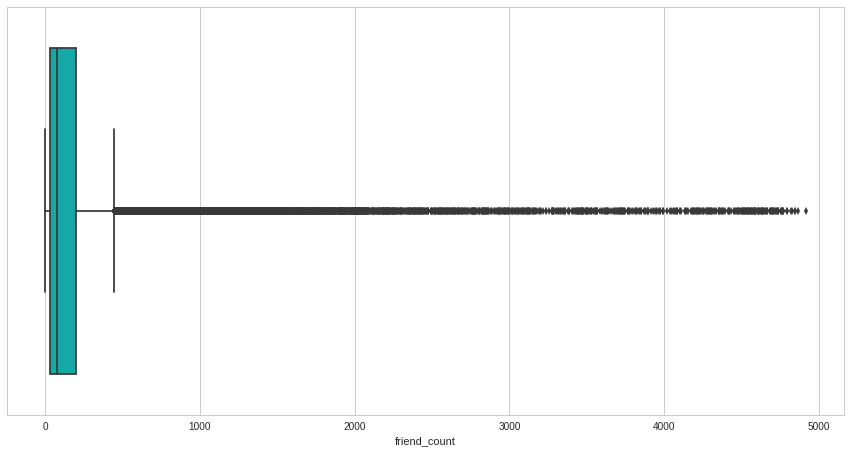

In [33]:
# Draw box plot to visualize outliers. Here in facebook the outliers are who have fake account to do likes.

fig = plt.figure(figsize=(15,7.5))
sns.set_style("whitegrid")
sns.boxplot(x='friend_count', data=facebook_data, color='c')
plt.show()

In [0]:
# Remove the complete rows where the friend_count is outlier

outliers_to_drop = detect_outliers('friend_count')
#print (outliers_to_drop)
#print (facebook_data.index(outliers_to_drop))
facebook_data_remout_friend_count = facebook_data.drop(facebook_data.index[outliers_to_drop])
facebook_data = facebook_data_remout_friend_count


In [46]:
# Reindexing the facebook data after removing rows

facebook_data.reset_index(drop=True, inplace=True)
facebook_data.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,20


In [0]:
# Remove the complete rows where the friend_count is 0

facebook_data_rem_friend_count_0 = facebook_data.drop(facebook_data.index[facebook_data['friend_count'] == 0])
facebook_data = facebook_data_rem_friend_count_0

In [50]:
# Reindexing the facebook data after removing rows

facebook_data.reset_index(drop=True, inplace=True)
facebook_data.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
84093,1965957,30,14,1983,10,male,547.0,442,273,1665,3292,1356,2828,309,464,40
84094,1599774,22,21,1991,5,male,538.0,444,252,2307,692,54,340,2253,352,40
84095,1640493,14,27,1999,2,female,85.0,445,313,2517,2607,2468,1909,49,698,20
84096,2054882,25,21,1988,1,female,329.0,444,147,2616,1889,2554,982,62,907,40
84097,1220910,22,25,1991,12,male,584.0,444,341,3926,2004,3926,1153,0,851,40


In [51]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84098 entries, 0 to 84097
Data columns (total 16 columns):
userid                   84098 non-null int64
age                      84098 non-null int64
dob_day                  84098 non-null int64
dob_year                 84098 non-null int64
dob_month                84098 non-null int64
gender                   84098 non-null object
tenure                   84098 non-null float64
friend_count             84098 non-null int64
friendships_initiated    84098 non-null int64
likes                    84098 non-null int64
likes_received           84098 non-null int64
mobile_likes             84098 non-null int64
mobile_likes_received    84098 non-null int64
www_likes                84098 non-null int64
www_likes_received       84098 non-null int64
age_group                84098 non-null object
dtypes: float64(1), int64(13), object(2)
memory usage: 10.3+ MB


In [53]:
facebook_data.friend_count.describe()

count    84098.000000
mean       105.177864
std        101.249090
min          1.000000
25%         29.000000
50%         70.000000
75%        153.000000
max        445.000000
Name: friend_count, dtype: float64

friend_count
1      1806
2      1111
3       850
4       739
5       783
6       709
7       664
8       706
9       694
10      732
11      665
12      649
13      693
14      691
15      670
16      691
17      625
18      707
19      688
20      677
21      688
22      682
23      681
24      722
25      659
26      623
27      656
28      650
29      710
30      642
       ... 
416      28
417      17
418      32
419      20
420      28
421      32
422      30
423      27
424      28
425      33
426      32
427      22
428      31
429      25
430      31
431      37
432      35
433      22
434      31
435      20
436      34
437      31
438      21
439      25
440      15
441      31
442      25
443      27
444      15
445      25
Name: age_group, Length: 445, dtype: int64


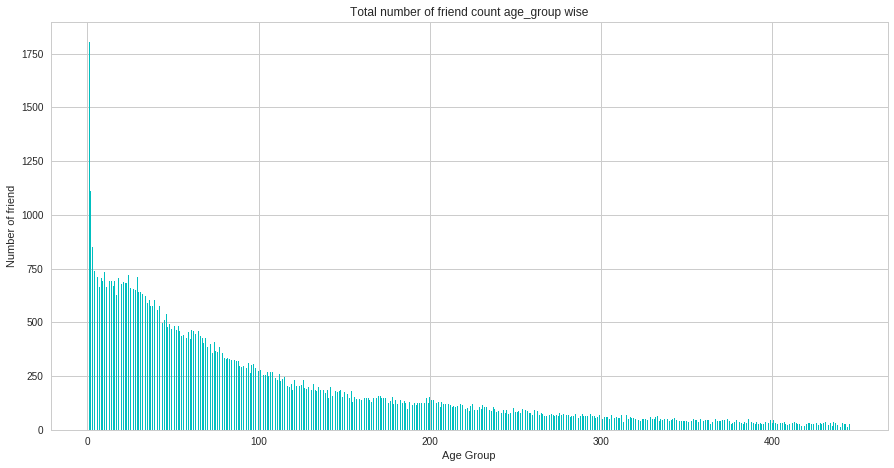

In [62]:
# Draw a bar plot to visualize which age group have more friends
fig = plt.figure(figsize=(15,7.5))
y=facebook_data['age_group'].groupby(facebook_data['friend_count']).count()
print (y)
plt.bar(y.index, y.values, color='c', width=0.5)
plt.title('Total number of friend count age_group wise')
plt.ylabel('Number of friend')
plt.xlabel('Age Group')
plt.legend()

In [0]:
# Draw a factor plot to visualize which gender age group wise has more friends

fig = plt.figure(figsize=(20,10))
sns.factorplot(x='age_group', y='friend_count', hue='gender', data=facebook_data, kind='count', size=10)
plt.show()

In [0]:
def friend_count_cat(row):
  if row['friend_count'] > 0 and row['friend_count'] <= 100 :
     return 'A'
  if row['friend_count'] > 100 and row['friend_count'] <= 200 :
     return 'B'
  if row['friend_count'] > 200 and row['friend_count'] <= 300 :
     return 'C'
  if row['friend_count'] > 300 and row['friend_count'] <= 400 :
     return 'D'
  if row['friend_count'] > 400 and row['friend_count'] <= 500 :
     return 'E'
  if row['friend_count'] > 500 and row['friend_count'] <= 1000 :
     return 'F'
  if row['friend_count'] > 1000 and row['friend_count'] <= 2000 :
     return 'G'
  if row['friend_count'] > 2000:
     return 'H'
  
facebook_data['friend_count_cat'] = facebook_data.apply(lambda row: friend_count_cat(row),axis=1)

In [0]:
facebook_data.head()

In [0]:
fig = plt.figure(figsize=(20,10))
pkmn_type_colors = ['#78C850',  # WE
                    '#F08030',  # NA
                    '#6890F0',  # ANZ
                    '#A8B820',  # ME
                    '#A8A878',  # LA
                    '#A040A0',  # SA
                    '#F8D030',  # CEE
                    '#E0C068',  # EA
                    '#EE99AC',  # SSA
                    '#C03028',  # SA
                    
                   ]
sns.countplot(x='friend_count_cat', data=facebook_data, palette=pkmn_type_colors)
 # Rotate x-labels
plt.xticks(rotation=45)

In [0]:
fig = plt.figure(figsize=(20,10))
sns.factorplot(x='friend_count_cat', hue='gender', data=facebook_data, kind='count', size=10)
plt.show()

In [0]:
fig = plt.figure(figsize=(20,10))
sns.factorplot(x='friend_count_cat', hue='age_group', data=facebook_data, kind='count', size=10)
plt.show()

In [0]:
fig = plt.figure(figsize=(20,10))
sns.factorplot(x='age_group', hue='friend_count_cat', data=facebook_data, kind='count', size=10)
plt.show()

In [0]:
forfactorplot = facebook_data

In [0]:
forfactorplot['gender_num'] = np.where(forfactorplot.gender == 'male', 1, 0)

In [0]:
def friend_count_cat_num(row):
  if row['friend_count'] > 0 and row['friend_count'] <= 100 :
     return '1'
  if row['friend_count'] > 100 and row['friend_count'] <= 200 :
     return '2'
  if row['friend_count'] > 200 and row['friend_count'] <= 300 :
     return '3'
  if row['friend_count'] > 300 and row['friend_count'] <= 400 :
     return '4'
  if row['friend_count'] > 400 and row['friend_count'] <= 500 :
     return '5'
  if row['friend_count'] > 500 and row['friend_count'] <= 1000 :
     return '6'
  if row['friend_count'] > 1000 and row['friend_count'] <= 2000 :
     return '7'
  if row['friend_count'] > 2000:
     return '8'
  
forfactorplot['friend_count_cat_num'] = forfactorplot.apply(lambda row: friend_count_cat_num(row),axis=1)

In [0]:
def age_group_num(row):
  #print ('hi')
  if row['age'] < 20 :
     return '20'
  if row['age'] >=20 and row['age'] < 40 :
     return '40'
  if row['age'] >= 40 and row['age'] < 60 :
     return '60'
  if row['age'] >= 60 and row['age'] < 80:
     return '80'
  if row['age']  >= 80:
     return '100'
  return '101'

forfactorplot['age_group_num'] = forfactorplot.apply(lambda row: age_group_num(row),axis=1)


In [0]:
forfactorplot.tail()

In [0]:
fig = plt.figure(figsize=(20,10))
sns.factorplot(x='age_group_num', y='gender_num', hue='friend_count_cat', data=forfactorplot, kind='bar', size=10, aspect=2.5)
plt.show()

### **Tenure analysis**

In [0]:
facebook_data.tenure.describe()

In [0]:
# Analysis of trend YoY - New users onboard

fig = plt.figure(figsize=(20,10))

bin_edges = [0,365,730,1095,1460,1825,2190,2555,2920]
plt.hist(facebook_data['tenure'], bins=bin_edges, facecolor='c', alpha=0.75, rwidth=0.90)
plt.xlabel('tenure')
plt.ylabel('No of facebook users')
plt.grid(True)

In [0]:
# Analysis of trend YoY - How many new male and female users onboard

def tenure_bin(row):
  if row['tenure'] <= 365 :
     return '1'
  if row['tenure'] > 365 and row['tenure'] <= 730 :
     return '2'
  if row['tenure'] > 730 and row['tenure'] <= 1095 :
     return '3'
  if row['tenure'] > 1095 and row['tenure'] <= 1460 :
     return '4'
  if row['tenure'] > 1460 and row['tenure'] <= 1825 :
     return '5'
  if row['tenure'] > 1825 and row['tenure'] <= 2190 :
     return '6'
  if row['tenure'] > 2190 and row['tenure'] <= 2555 :
     return '7'
  if row['tenure'] > 2555:
     return '8'
  
facebook_data['tenure_bin'] = facebook_data.apply(lambda row: tenure_bin(row),axis=1)



In [0]:
fig = plt.figure(figsize=(20,10))
sns.factorplot(x='tenure_bin', hue='gender', data=facebook_data, kind='count', size=10)
#sns.
plt.show()

### **Likes analysis**

In [0]:
facebook_data[['likes',	'likes_received',	'mobile_likes',	'mobile_likes_received',	'www_likes',	'www_likes_received']].describe()	

In [0]:
# How many users are more active on mobile
a = len(facebook_data[(facebook_data['mobile_likes']) > (facebook_data['www_likes'])])
print (a)
# How many male/female are active on mobile


#facebook_data[(facebook_data[(facebook_data['mobile_likes']) > (facebook_data['www_likes'])]) and (facebook_data[facebook_data['gender'] == 'female'])]

# Which age group is more active on mobile


# Which age group male/female is more active on mobile


